# Simulation of temperature profile evolution in permafrost

This notebook creates and runs a one-dimensional simulation model of temperature evolution under sinusoidal forcing.

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

The block below defines the code for the model:

In [2]:
class HeatConductionSimulator(object):
    
    _ONE_YEAR = 365.25 * 24 * 60.0 * 60.0

    def __init__(self,
                 thermal_diffusivity=1.0e-6,
                 profile_depth=100,
                 geotherm=0.025,
                 surface_temp=-5.0,
                 amplitude=5.0,
                 period=_ONE_YEAR,
                 num_nodes=100,
                 diffusion_number=0.2,
                ):
        """Initialize the HeatConductionSimulator.

        Parameters
        ----------
        """
        self.profile_depth = profile_depth
        self.surface_temp = surface_temp
        self.amplitude = amplitude
        self.period = period
        self.alpha = diffusion_number  # must be <= 1/2 for numerical stability
        self.dz = profile_depth / (num_nodes - 1)
        self.timestep_duration = self.alpha * self.dz * self.dz / thermal_diffusivity

        self.depth = np.linspace(0, profile_depth, num_nodes)
        self.temp = surface_temp + geotherm * self.depth
        self.current_time = 0.0
        
    def run_one_step(self):
        """Advance for one time step"""
        self.temp[0] = (self.surface_temp + 
                        self.amplitude * np.sin(2.0 * np.pi * self.current_time / self.period))
        self.temp[1:-1] += self.alpha * (self.temp[2:] - 2 * self.temp[1:-1] + self.temp[:-2])
        self.current_time += self.timestep_duration

    def run_n_steps(self, n):
        for i in range(n):
            self.run_one_step()

In the next block, we creat an *instance* of the model. This initializes it but does not actually run it.

In [3]:
hcs = HeatConductionSimulator()

Let's check what the time-step size is:

In [4]:
print('Time step size is ' + str(hcs.timestep_duration) + ' seconds.')

Time step size is 204060.81012141623 seconds.


Set some parameters that will control our run and the capturing of output:

In [5]:
save_every = 10
nsteps = int(20 * 365.25 * 24 * 3600.0 / (hcs.timestep_duration * save_every))

The next few cells set up the animation

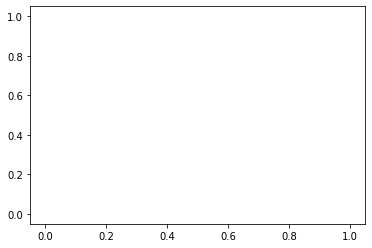

In [6]:
# First, set up a blank figure
fig, ax = plt.subplots()

# And placeholder lists for data
xdata = []
ydata = []
obj = ax.plot([], [], color = 'k')

In [7]:
# Then, set up an initialization function
def init():
    ax.set_ylim(0, hcs.profile_depth)
    ax.set_xlim(hcs.surface_temp - hcs.amplitude, hcs.surface_temp + hcs.amplitude)
    ax.set_ylabel('Depth (m)')
    ax.set_xlabel('Temperature (degrees C)')
    return(obj)

In [8]:
# Next, define the update function
def update(i):
    ax.cla()
    hcs.run_n_steps(save_every)
    xdata = hcs.temp
    ydata = hcs.depth
    ax.set_ylim(0, hcs.profile_depth)
    ax.set_xlim(hcs.surface_temp - hcs.amplitude, hcs.surface_temp + hcs.amplitude)
    ax.set_ylabel('Depth (m)')
    ax.set_xlabel('Temperature (degrees C)')
    ax.invert_yaxis()
    obj = ax.plot(xdata, ydata, color = 'k')
    return(obj)

Now, use FuncAnimation to run the model.

In [9]:
# Run the animation!
anim = FuncAnimation(fig, update, nsteps, init_func = init, blit = True)
plt.show()

In [10]:
# Convert the animation to HTML
vid = HTML(anim.to_html5_video())

In [11]:
vid
# If you modify any component of the animation, restart your iPython kernel and re-run all of the above cells.